This Notebook is a 2nd in Week 1, and it builds a simple NN to predict a taste of coffee depending on Temperature and Duration of cooking.
* NN is implemented in TensorFlow
* NN has 2 sigmoid layers [x3->x1]
* 10 epochs
* forward and back propagation (theory is discussed later)
* prediction for 2 test points

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-07-16 10:44:03.014288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load inputs (Coffee roasting)

The two features are Temperature in Celsius and Duration in minutes. Coffee Roasting at Home suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as temperature rises, the duration should shrink.

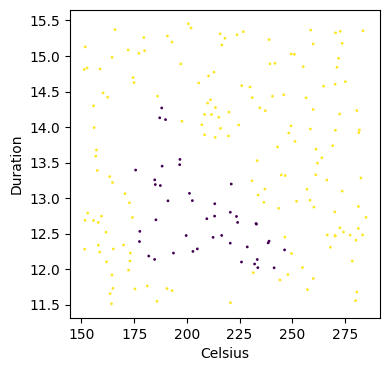

In [2]:
inputs = np.load("coffee_roast.npz")

x_train = inputs["train_x"]
y_train = inputs["train_y"]

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_train[:,0], x_train[:,1], c=1-y_train, s=1)
ax.set_ylabel("Duration")
ax.set_xlabel("Celsius")
plt.show()

Normalize inputs

In [3]:
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(x_train)
norm_x = norm_layer(x_train)

# Model
Let's build the "Coffee Roasting Network" - two layers with sigmoid activations as shown below:
   <center> <img  src="images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, input_dim=2, activation="sigmoid", name="input"),
    tf.keras.layers.Dense(units=1, activation="sigmoid", name="output")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 3)                 9         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [5]:
w1, b1 = model.get_layer("input").get_weights()
w2, b2 = model.get_layer("output").get_weights()

print(f"layer 1 weight = {w1}, and bias = {b1}")
print(f"layer 2 weight = {w2}, and bias = {b2}")


layer 1 weight = [[ 0.91695833  0.8808569   0.9012588 ]
 [-0.9022442   0.14244461 -0.2091673 ]], and bias = [0. 0. 0.]
layer 2 weight = [[ 0.46166086]
 [ 0.81969726]
 [-0.7122853 ]], and bias = [0.]


Compile model

copy inputs 1000 times to reduce epochs from 10 000 to 10

In [6]:
Xt = np.tile(norm_x,(1000,1))
Yt = np.tile(y_train, (1000,1))

In [7]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(Xt, Yt, epochs=10, )

Epoch 1/10


6250/6250 [==============================] - 39s 6ms/step - loss: 0.1898
Epoch 2/10
6250/6250 [==============================] - 43s 7ms/step - loss: 0.0469
Epoch 3/10
6250/6250 [==============================] - 35s 6ms/step - loss: 0.0236
Epoch 4/10
6250/6250 [==============================] - 39s 6ms/step - loss: 0.0164
Epoch 5/10
6250/6250 [==============================] - 29s 5ms/step - loss: 0.0127
Epoch 6/10
6250/6250 [==============================] - 30s 5ms/step - loss: 0.0103
Epoch 7/10
6250/6250 [==============================] - 40s 6ms/step - loss: 0.0086
Epoch 8/10
6250/6250 [==============================] - 34s 5ms/step - loss: 0.0072
Epoch 9/10
6250/6250 [==============================] - 28s 4ms/step - loss: 0.0061
Epoch 10/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.0053


The training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches.

$200000  / 32 = 6250$

# Prediction

<img align="left" src="./images/C2_W1_RoastingDecision.PNG"     style=" width:380px; padding: 10px 20px; " >

Updates weights

In [8]:
w1, b1 = model.get_layer("input").get_weights()
w2, b2 = model.get_layer("output").get_weights()

print(f"layer 1 weight = {w1}, and bias = {b1}")
print(f"layer 2 weight = {w2}, and bias = {b2}")

layer 1 weight = [[14.555286    0.08775849 13.091228  ]
 [ 0.3181159  11.132984   10.940715  ]], and bias = [15.175841  13.492102   1.3011866]
layer 2 weight = [[ 28.36547 ]
 [ 28.204082]
 [-38.459373]], and bias = [-36.9157]


Test inputs

In [9]:
x_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example

x_test_n = norm_layer(x_test)
y_predict = model.predict(x_test_n)
y_predict = y_predict > 0.5
y_predict

1/1 [==============================] - 1s 1s/step


array([[ True],
       [False]])

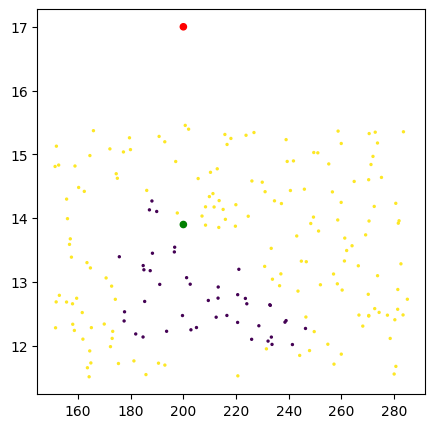

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(x_train[:,0], x_train[:,1], c=1-y_train, s=2)

d = {True:'g',False:'r'}
ax.scatter(x_test[:,0], x_test[:,1], c=[d[x] for x in y_predict[:,0]], s=20)

plt.show()